# Imports


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Initial conditions

In [ ]:
N=30
Add=270
nf=N+Add
p=.8
m=5

# Initial core

In [ ]:
ini=N
def initial(p):
    if (p<1):          #Binomial initial condition
        inode=[]
        ilink=[]
        bi = np.ndarray.tolist(np.random.binomial(N-1,p,N))
        for i in range (N):
            inode.append(i+1)
            ilink.append(bi[i])

    else:               #fixed initial condition
        inode=[]
        ilink=[]
        n=p             #Enter N and n here
        for i in range (N):
            inode.append(i+1)
            ilink.append(n)
    return [inode,ilink]

In [ ]:
init=initial(p)
inode=init[0].copy()
ilink=init[1].copy()

In [ ]:
print(ilink)

[24, 20, 21, 22, 16, 19, 27, 24, 22, 24, 22, 25, 19, 24, 23, 22, 22, 23, 24, 21, 25, 24, 23, 21, 24, 20, 23, 27, 22, 20]


In [ ]:
print(" Nodes :",inode,"\n","\n","links :",ilink,"\n","\n","Length of list of nodes and links :",len(inode),len(ilink))


 Nodes : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 
 
 links : [24, 20, 21, 22, 16, 19, 27, 24, 22, 24, 22, 25, 19, 24, 23, 22, 22, 23, 24, 21, 25, 24, 23, 21, 24, 20, 23, 27, 22, 20] 
 
 Length of list of nodes and links : 30 30


# Final link distribution

In [ ]:
def New(x,y):
    node=x.copy()
    link=y.copy()
    for l in range(Add):
        sum=0
        for i in link: sum+=i
        nlink=[link[0]/sum]
        for j in range(1,len(link)): nlink.append(nlink[j-1]+(link[j])/sum)
        k=1;err=0
        b=[]
        while(k<=m):
            ran=random.uniform(0,1)
            for i in range(len(nlink)):
                if (ran<= nlink[i]):
                    a=i
                    if a not in b:
                        link[a]+=1
                        b.append(a)
                        k+=1
                    break
            err+=0.01
            if err==100 :
                print("error occured")
                break
        t=(node[-1])+1
        node.append(t)
        link.append(m)
    return [node,link]

# Introducing internal links

In [ ]:
def perterb(A):
    inode=[]
    ilink=[]
    bi=[]
    N=len(A)
    for i in range(N):
        bi+=np.ndarray.tolist(np.random.binomial(N-1-A[i],p2,1))
    for i in range (N):
        inode.append(i+1)
        ilink.append(bi[i])
    final = [a + b for a, b in zip(A, ilink)]
    return final


In [ ]:
def barabasi(t):
    B=perterb(A)
    if t==1:
        return B
    else :
        return A

In [ ]:
presult=New(inode,ilink)
node=presult[0].copy()
link=presult[1].copy()
A=link
A=barabasi(1)
print(A)

[297, 292, 304, 285, 285, 280, 309, 314, 287, 294, 288, 304, 292, 279, 301, 306, 286, 280, 292, 285, 302, 292, 302, 286, 284, 276, 294, 280, 292, 289, 242, 255, 255, 241, 255, 262, 251, 254, 246, 247, 244, 252, 258, 254, 253, 252, 246, 264, 244, 245, 244, 250, 263, 252, 261, 250, 233, 253, 226, 238, 244, 238, 255, 255, 236, 250, 252, 253, 251, 248, 239, 246, 252, 240, 262, 248, 252, 257, 252, 250, 253, 244, 238, 258, 253, 251, 251, 241, 232, 257, 246, 248, 244, 241, 246, 244, 257, 250, 249, 251, 234, 236, 248, 247, 245, 233, 251, 243, 238, 246, 258, 258, 253, 250, 253, 240, 241, 244, 234, 222, 243, 245, 250, 248, 255, 240, 253, 245, 247, 247, 243, 244, 261, 253, 242, 236, 241, 229, 247, 245, 238, 239, 244, 246, 234, 236, 244, 230, 237, 244, 251, 258, 240, 249, 235, 256, 252, 248, 237, 241, 246, 239, 241, 244, 240, 236, 243, 246, 237, 252, 256, 239, 244, 258, 244, 235, 247, 239, 248, 244, 230, 245, 248, 245, 246, 243, 250, 244, 238, 246, 255, 234, 234, 243, 228, 238, 246, 243, 236, 232,

In [ ]:
#print(" Nodes :",node,"\n","\n","links :",link,"\n","\n","Length of list of nodes and links :",len(node),len(link))


In [ ]:
degree=[]
for i in range(0, nf):
    degree.append(0)
node=[]
for i in range(1, nf+1):
    node.append(i)

for i in range (0, nf):
    j=0
    for k in range(0, nf):
        if(A[k]==i+1):
            j=j+1
    degree[i]=j/float(nf)
cumulative=[]
for i in range (0, nf):
    cumulative.append(0)
#cumulative[0]=0
for i in range (0,nf-1):
    cumulative[i+1]=cumulative[i]+degree[nf-1-i]

cumulative[nf-1]=1
cumulative[nf-1]
cumulative1=[]
for i in range (0, nf):
    cumulative1.append(cumulative[i])
modi=[]
for i in range(0, nf):
    modi.append(0)
for i in range(0, nf):
    if cumulative[i] not in modi:
        modi[i]=cumulative[i]
for i in range(0, nf):
    cumulative[i]=modi[i]

final=[]
for i in range (0, nf):
    final.append(cumulative[nf-1-i])

In [ ]:
x1=[]
x2=[]
y1=[]
y2=[]
x=[]
for i in range(1,nf+1):
    x.append(i)
for i in range(1, N+1):
    x1.append(i)
for i in range( N+1, nf+1):
    x2.append(i)

for i in range(1,  N+1):
    y1.append(A[i-1])
for i in range( N+1, nf+1):
    y2.append(A[i-1])

# Plot of number of nodes against links

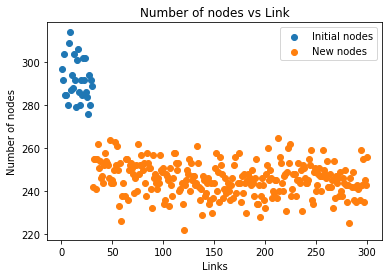

In [ ]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.legend(["Initial nodes" , "New nodes"])
plt.title("Number of nodes vs Link")
plt.xlabel("Links")
plt.ylabel("Number of nodes")
plt.show()

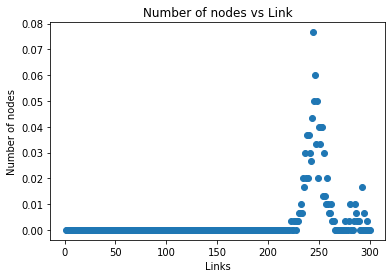

In [ ]:
plt.scatter(node, degree)
plt.title("Number of nodes vs Link")
plt.xlabel("Links")
plt.ylabel("Number of nodes")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


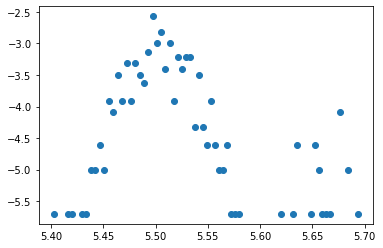

In [ ]:
plt.scatter(np.log(x), np.log(degree))

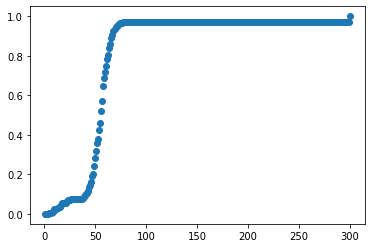

In [ ]:
plt.scatter(node, cumulative1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


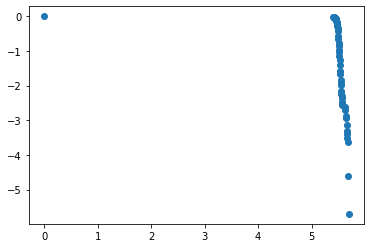

In [ ]:
plt.scatter(np.log(x), np.log(final))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9733333333333334, 0, 0, 0.9700000000000001, 0.9666666666666668, 0, 0.9633333333333335, 0.9600000000000002, 0.9566666666666669, 0.9500000000000002, 0.9433333333333335, 0.9333333333333335, 0.9266666666666667, 0.9066666666666667, 0.89, 0.86, 0.84, 0.8033333333333333, 0.7833333333333333, 0.7466666666666667, 0.7166666666666667, 0.6900000000

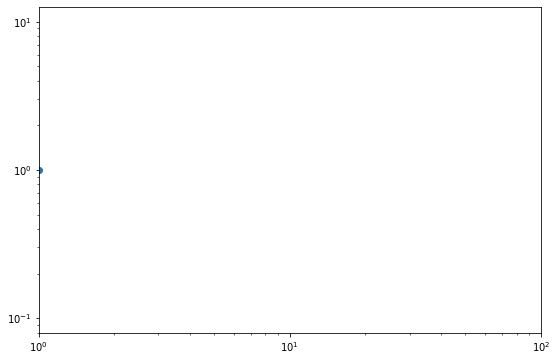

In [ ]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(x, final)

# Set logarithmic scale on the both variables
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlim([1, 100])
print(final)

In [ ]:
#np.log(final)

In [ ]:
#print(final)

In [ ]:
#print(300*final)##

In [ ]:
Final=[]
for i in range (0, nf):
    Final.append(nf*final[i])

In [ ]:
#Final

In [ ]:
Degree=[]
for i in range (0, nf):
    Degree.append(nf*degree[i])

In [ ]:
#cumulative